<a href="https://colab.research.google.com/github/Grey-matter2020/Machine-Learning/blob/main/Notebook/Donors_Choose/Donors_Choose_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DonorsChoose

https://www.kaggle.com/competitions/donorschoose-application-screening/data

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p258326`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Educational Support for English Learners at Home</code></li><li><code>Techie Kindergarteners</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need shine guards, athletic socks, Soccer Balls, goalie gloves, and training materials for the upcoming Soccer season.</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `05-12-2016  13:43:57`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `897464ce9ddc600bced1151f324dd63a`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, 4 essays had to be submitted.
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p258326`   
**`description`** | Desciption of the resource. **Example:** `Brewster Wall Pops WPE99065 Peel & Stick Calypso Dry-Erase Dots with Marker, 3-Count`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `16.99`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

In [7]:
# Connect to the Google Drive to read the iris.csv file
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
#List the files in the Data Analyst folder
!ls "/content/gdrive/My Drive/Machine Learning/Data Analyst"

Donors_Choose_Data_Analysis.ipynb  resources.csv  train_data.csv


In [13]:
#Changing the directory to Data Analyst folder
%cd "/content/gdrive/My Drive/Machine Learning/Data Analyst"

/content/gdrive/My Drive/Machine Learning/Data Analyst


In [14]:
!pwd

/content/gdrive/My Drive/Machine Learning/Data Analyst


In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import re
from nltk.corpus import stopwords
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
import spacy
nlp =spacy.load("en_core_web_sm",disable=['parser', 'ner'])
lemmatizer = spacy.lang.en.English()

## 1.1 Reading Data

In [16]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [17]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :\n", project_data.columns.values)
print('-'*50)
project_data.head(2)

Number of data points in train data (109248, 16)
--------------------------------------------------
The attributes of data :
 ['id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']
--------------------------------------------------


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,05-12-2016 13:43,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,25-10-2016 09:22,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


In [18]:
print("Number of data points in resource data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resource data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# 1.2 Data Analysis

In [ ]:
#To see if any rows have missing values
print(project_data.count())
print("*"*50)
project_data.shape

Unnamed: 0                                      109248
id                                              109248
teacher_id                                      109248
teacher_prefix                                  109245
school_state                                    109248
project_submitted_datetime                      109248
project_grade_category                          109248
project_subject_categories                      109248
project_subject_subcategories                   109248
project_title                                   109248
project_essay_1                                 109248
project_essay_2                                 109248
project_essay_3                                   3758
project_essay_4                                   3758
project_resource_summary                        109248
teacher_number_of_previously_posted_projects    109248
project_is_approved                             109248
dtype: int64
**************************************************


(109248, 17)

In [ ]:
#Remove the missing rows for teacher_prefix.Essay_3 and essay_4 is not needed as we will merge all essay columns into one later
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
project_data.dropna(subset=['teacher_prefix'],inplace=True)                    #deafult axis = 0

In [ ]:
project_data.shape

(109245, 17)

** As we can see that teacher_prefix has 3 values missing and essay_2 and essay_3 has many values missing **

In [ ]:
#To see if any rows have missing values
print(resource_data.count())
print("*"*50)
resource_data.shape

id             1541272
description    1540980
quantity       1541272
price          1541272
dtype: int64
**************************************************


(1541272, 4)

** As we can see that description has some around 300 values missing **

In [10]:
y_value_counts = project_data['project_is_approved'].value_counts()
print(y_value_counts)
type(y_value_counts)

1    92706
0    16542
Name: project_is_approved, dtype: int64


pandas.core.series.Series

In [ ]:
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")


Number of projects thar are approved for funding  92703 , ( 84.85788823287108 %)
Number of projects thar are not approved for funding  16542 , ( 15.14211176712893 %)


**We have imbalanced dataset where 85% belong to one class and 15% belong to another class**

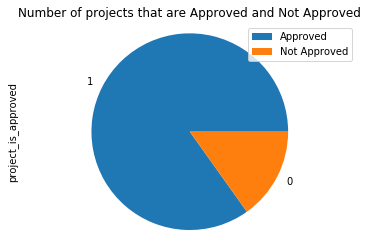

In [ ]:
plt.title("Number of projects that are Approved and Not Approved")
project_data['project_is_approved'].value_counts().plot.pie()
plt.axis('equal')
plt.legend(labels=['Approved','Not Approved'])
plt.show()

### 1.2.1 Univariate Analysis: School State

In [11]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'percentage_approved_proposals']

In [12]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['percentage_approved_proposals'], inplace=True)
print("States with lowest % approvals")
print("\n")
print(temp.head(5))
print('='*50)
print("\n")
print("States with highest % approvals")
print("\n")
print(temp.tail(5))

States with lowest % approvals


   state_code  percentage_approved_proposals
46         VT                       0.800000
7          DC                       0.802326
43         TX                       0.813142
26         MT                       0.816327
18         LA                       0.831245


States with highest % approvals


   state_code  percentage_approved_proposals
30         NH                       0.873563
35         OH                       0.875152
47         WA                       0.876178
28         ND                       0.888112
8          DE                       0.897959


* **All States have more than 80% Approval Rate**
* **The acceptances rates vary from 80% to 90% across states and hence state is a feature that impacts approval rates**
* **DE has the highest acceptance rate**
* **VT has the lowest acceptance rate**

In [13]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    plt.figure(figsize=(20,5))
    plt.bar(data[xtick],data['total'])
    plt.bar(data[xtick],data['project_is_approved'])
    plt.legend(labels=['total','approved'])
    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.show()

In [14]:
def univariate_barplots(data, col1, col2='project_is_approved',top=False):
    temp=pd.DataFrame(data.groupby(col1)[col2].sum().reset_index())
    temp['total']=pd.DataFrame(data.groupby(col1)["project_is_approved"].count().reset_index())['project_is_approved']
    temp['Avg_approval']=pd.DataFrame(project_data.groupby(col1)["project_is_approved"].mean().reset_index())['project_is_approved']
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    if top:
        temp = temp[0:top]
    stack_plot(temp, xtick=col1, col2='project_is_approved', col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))        

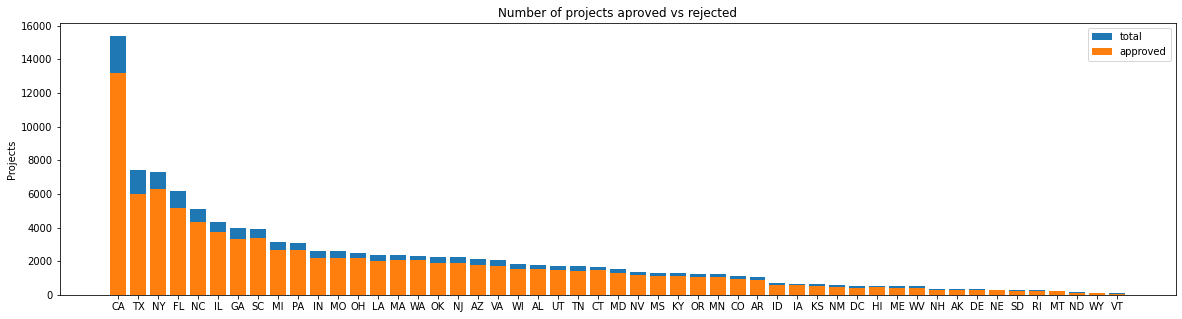

   school_state  project_is_approved  total  Avg_approval
4            CA                13205  15388      0.858136
43           TX                 6014   7396      0.813142
34           NY                 6291   7318      0.859661
9            FL                 5144   6185      0.831690
27           NC                 4353   5091      0.855038
   school_state  project_is_approved  total  Avg_approval
39           RI                  243    285      0.852632
26           MT                  200    245      0.816327
28           ND                  127    143      0.888112
50           WY                   82     98      0.836735
46           VT                   64     80      0.800000


In [15]:
univariate_barplots(project_data, 'school_state', 'project_is_approved')

* **Highest no of proposals were received from state of CA**
* **Lowest no of proposals were received from state if VT**

### 1.2.2 Univariate Analysis: teacher_prefix

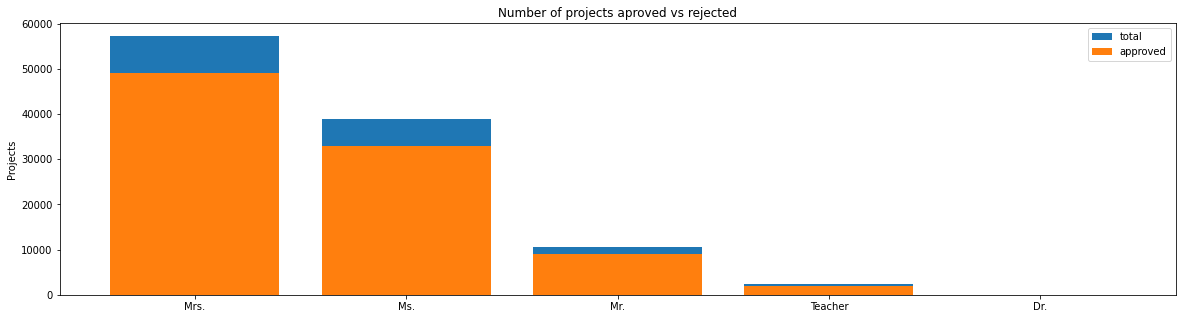

  teacher_prefix  project_is_approved  total  Avg_approval
2           Mrs.                48997  57269      0.855559
3            Ms.                32860  38955      0.843537
1            Mr.                 8960  10648      0.841473
4        Teacher                 1877   2360      0.795339
0            Dr.                    9     13      0.692308
  teacher_prefix  project_is_approved  total  Avg_approval
2           Mrs.                48997  57269      0.855559
3            Ms.                32860  38955      0.843537
1            Mr.                 8960  10648      0.841473
4        Teacher                 1877   2360      0.795339
0            Dr.                    9     13      0.692308


In [16]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved')

__SUMMARY: Doctors have the lowest acceptance Rate followed by Teachers. Individuals(both male and female) have almost equal sucess rate. Prefix impacts the approval rates__

### 1.2.3 Univariate Analysis: project_grade_category

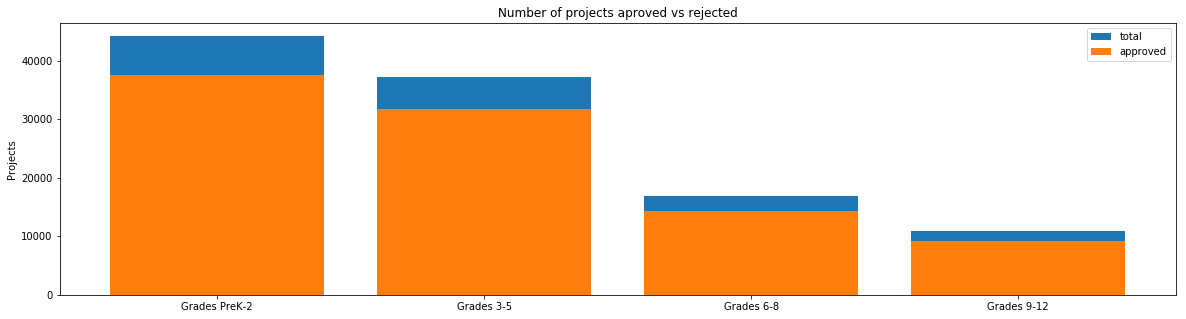

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31727  37135  0.854369
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9182  10962  0.837621
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31727  37135  0.854369
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9182  10962  0.837621


In [ ]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved')

__SUMMARY: Almost similar acceptance rate across Grades__

### 1.2.4 Univariate Analysis: project_subject_categories

In [18]:
project_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,05-12-2016 13:43,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,25-10-2016 09:22,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,31-08-2016 12:03,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,06-10-2016 21:16,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,11-07-2016 01:10,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [ ]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp=""
    for j in i.split(','):
        j=j.replace("The",'')
        j=j.replace(' ','')
        j=j.replace('&','_')
        j=j.strip()
        temp+=j+" "
    cat_list.append(temp.strip())      

In [ ]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


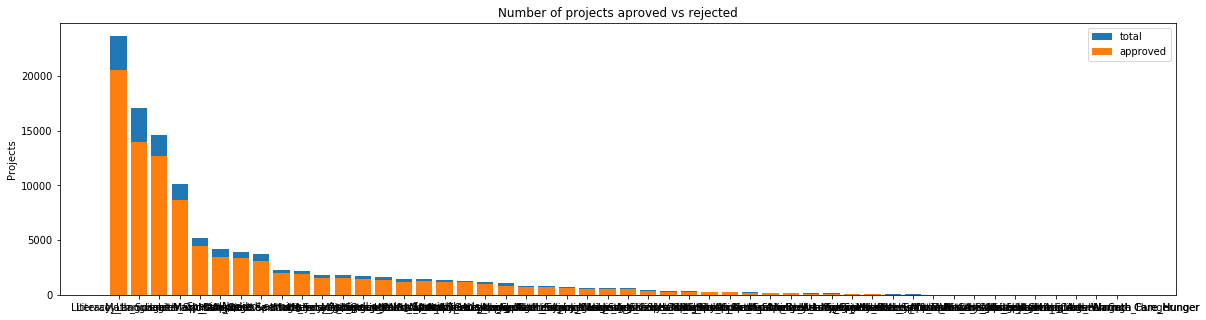

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20519  23654  0.867464
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12723  14634  0.869414
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                        clean_categories  project_is_approved  total       Avg
39       Math_Science Warmth Care_Hunger                    6     11  0.545455
41            Music_Arts AppliedLearning                    7     10  0.700000
7     AppliedLearning Warmth Care_Hunger                    8     10  0.800000
31  Literacy_Language Warmth Care_Hunger                    7      9  0.777778
45         Music_Arts Warmth Care_Hunger                    1      2  0.500000


In [ ]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=50)

* **Project Categories do have an impact on the Acceptance Rate**
* **Projects around Literacy_Language, Maths_Science, Health_Sports, Music_Arts have the highest acceptance rate**
* **Projects around Warth, Care_Hunger have the lowest acceptance rate**

In [ ]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
#Counter takes a list of words to count
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

In [ ]:
print(my_counter)

Counter({'Literacy_Language': 52236, 'Math_Science': 41419, 'Health_Sports': 14223, 'SpecialNeeds': 13642, 'AppliedLearning': 12135, 'Music_Arts': 10293, 'History_Civics': 5914, 'Warmth': 1388, 'Care_Hunger': 1388})


In [ ]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
my_counter.values()
my_counter.keys()
my_counter.items()
sorted_my_counter=dict(sorted(my_counter.items(),key=lambda kv: kv[1]))

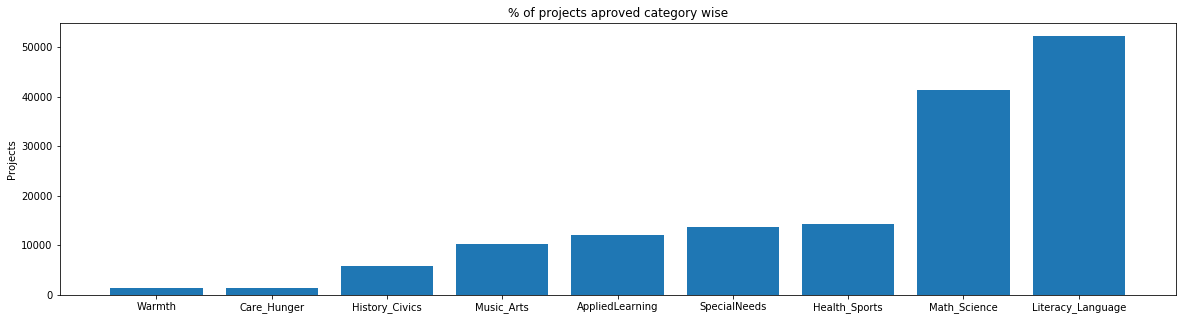

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(sorted_my_counter.keys(),sorted_my_counter.values())
plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.show()

In [ ]:
for i, j in sorted_my_counter.items():
    print("{:17} :  {:<10}".format(i,j))

Warmth            :  1388      
Care_Hunger       :  1388      
History_Civics    :  5914      
Music_Arts        :  10293     
AppliedLearning   :  12135     
SpecialNeeds      :  13642     
Health_Sports     :  14223     
Math_Science      :  41419     
Literacy_Language :  52236     


* ** We have the largest no of proposal received for the category Literacy_Language followed by Math_Science**
* ** The lowest is received for Warmth and Care_Hunger**

### 1.2.5 Univariate Analysis: project_subject_subcategories

In [ ]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp=""
    for j in i.split(','):
        j=j.replace("The",'')
        j=j.replace(' ','')
        j=j.replace('&','_')
        j=j.strip()
        temp+=j+" "
    sub_cat_list.append(temp.strip())  

In [ ]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


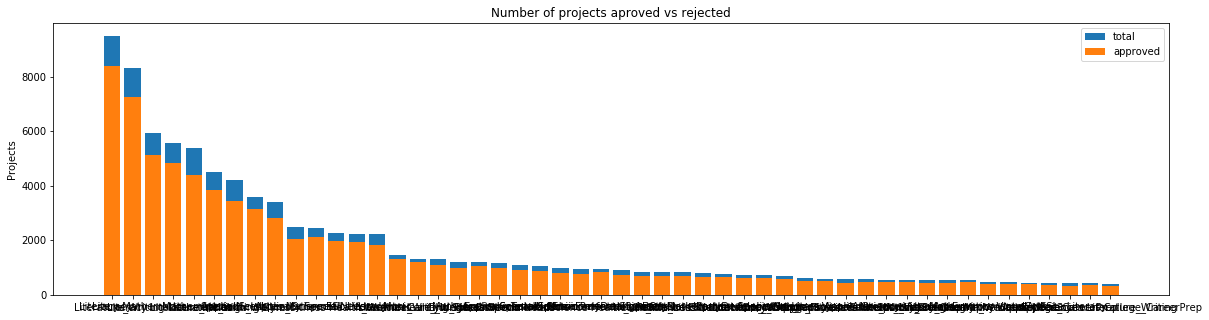

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7259   8324  0.872057
331  Literature_Writing Mathematics                 5139   5922  0.867781
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [ ]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

** Project Subcategories do have an impact on the Project Acceptance Rate**

In [ ]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter_subcategory = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter_subcategory.update(word.split())

In [ ]:
print(my_counter_subcategory)

Counter({'Literacy': 33699, 'Mathematics': 28072, 'Literature_Writing': 22177, 'SpecialNeeds': 13642, 'AppliedSciences': 10816, 'Health_Wellness': 10234, 'VisualArts': 6278, 'EnvironmentalScience': 5591, 'Gym_Fitness': 4509, 'ESL': 4367, 'EarlyDevelopment': 4254, 'Health_LifeScience': 4235, 'History_Geography': 3171, 'Music': 3145, 'College_CareerPrep': 2568, 'Other': 2372, 'TeamSports': 2192, 'CharacterEducation': 2065, 'PerformingArts': 1961, 'SocialSciences': 1920, 'Warmth': 1388, 'Care_Hunger': 1388, 'NutritionEducation': 1355, 'ForeignLanguages': 890, 'Civics_Government': 815, 'Extracurricular': 810, 'ParentInvolvement': 677, 'FinancialLiteracy': 568, 'CommunityService': 441, 'Economics': 269})


In [ ]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
my_counter_subcategory.values()
my_counter_subcategory.keys()
my_counter_subcategory.items()
sorted_my_counter_subcategory=dict(sorted(my_counter_subcategory.items(),key=lambda kv: kv[1]))

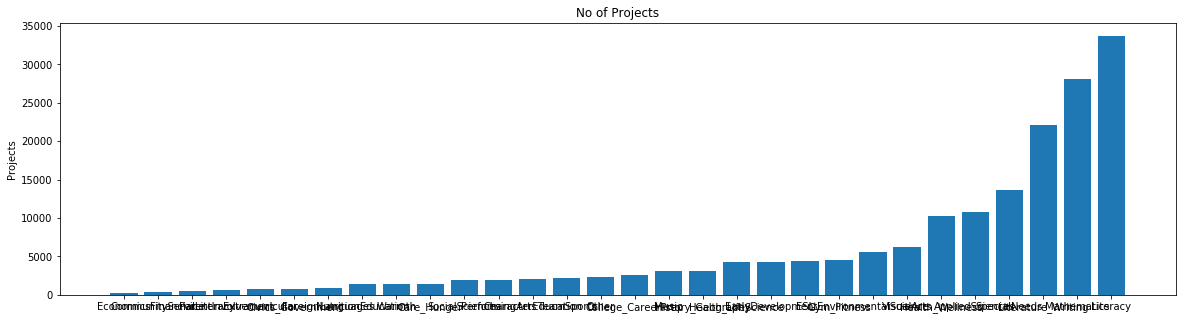

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(sorted_my_counter_subcategory.keys(),sorted_my_counter_subcategory.values())
plt.ylabel('Projects')
plt.title('No of Projects')
plt.show()

In [ ]:
for i, j in sorted_my_counter_subcategory.items():
    print("{:20} :  {:<10}".format(i,j))

Economics            :  269       
CommunityService     :  441       
FinancialLiteracy    :  568       
ParentInvolvement    :  677       
Extracurricular      :  810       
Civics_Government    :  815       
ForeignLanguages     :  890       
NutritionEducation   :  1355      
Warmth               :  1388      
Care_Hunger          :  1388      
SocialSciences       :  1920      
PerformingArts       :  1961      
CharacterEducation   :  2065      
TeamSports           :  2192      
Other                :  2372      
College_CareerPrep   :  2568      
Music                :  3145      
History_Geography    :  3171      
Health_LifeScience   :  4235      
EarlyDevelopment     :  4254      
ESL                  :  4367      
Gym_Fitness          :  4509      
EnvironmentalScience :  5591      
VisualArts           :  6278      
Health_Wellness      :  10234     
AppliedSciences      :  10816     
SpecialNeeds         :  13642     
Literature_Writing   :  22177     
Mathematics         

* **Highest no of proposals are received for Literacy, Mathematics and Literature Writing**

### 1.2.6 Univariate Analysis: Text features (Project Title)

In [ ]:
#Approach 1:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
sorted_word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
sorted_word_dict

{13: 1,
 12: 11,
 11: 30,
 1: 31,
 10: 3968,
 9: 5383,
 8: 7289,
 2: 8732,
 7: 10630,
 6: 14824,
 3: 18691,
 5: 19677,
 4: 19978}

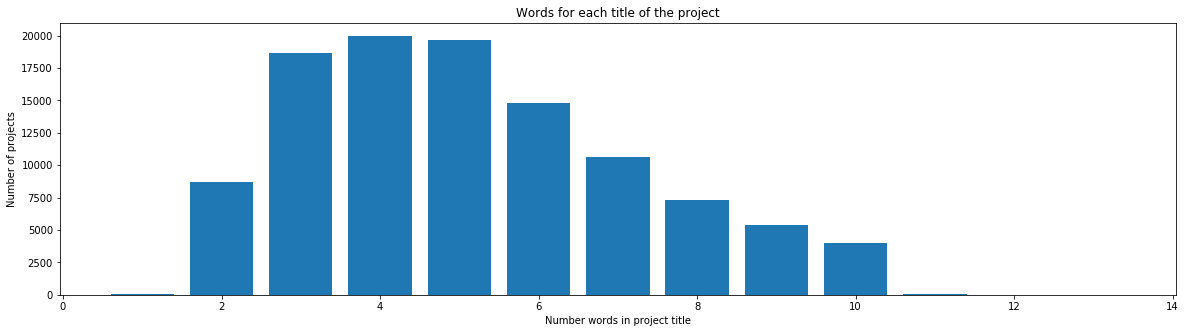

In [ ]:
#Below code didnt not arrange the bars in the ascending order and hence has to use an alternative approach
plt.figure(figsize=(20,5))
plt.bar(sorted_word_dict.keys(),sorted_word_dict.values())
plt.ylabel('Number of projects')
plt.xlabel('Number words in project title')
plt.title('Words for each title of the project')
plt.show()

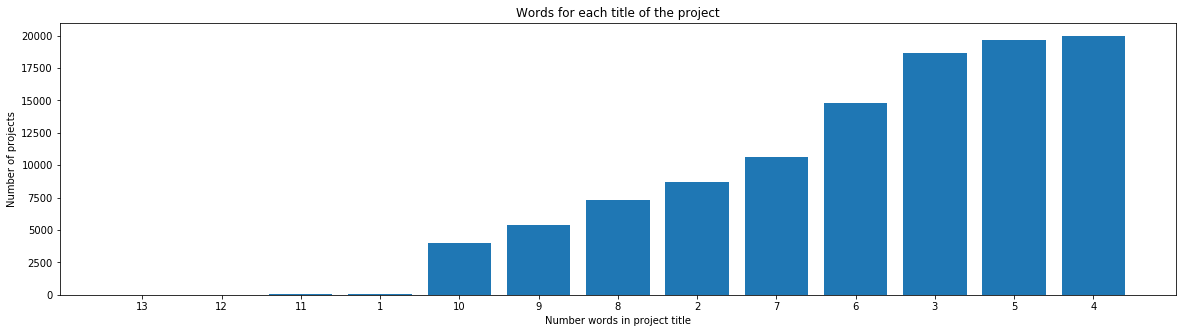

In [ ]:
#Approach 2:
plt.figure(figsize=(20,5))
ind = np.arange(len(sorted_word_dict))
plt.bar(ind,sorted_word_dict.values())
plt.ylabel('Number of projects')
plt.xlabel('Number words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(sorted_word_dict.keys()))
plt.show()

* ** Project title length varies from 1 to 13 words with maxiumum having less than 11 words

In [ ]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

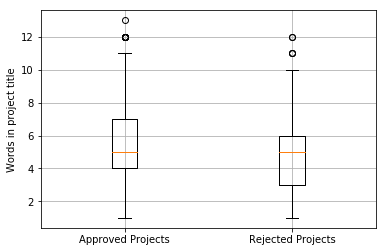

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

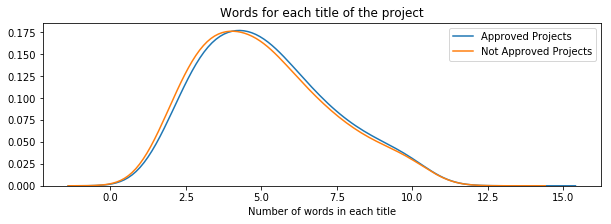

In [ ]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects",bw=0.8)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects",bw=0.8)
plt.title('Words for each title of the project')
plt.xlabel('Number of words in each title')
plt.legend()
plt.show()

* ** Dont see any difference in the distribution of the project title word count for apporved and rejected proposals**

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [25]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [26]:
project_data[project_data['id']=='p253737']

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,05-12-2016 13:43,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,My students are English learners that are work...


In [27]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

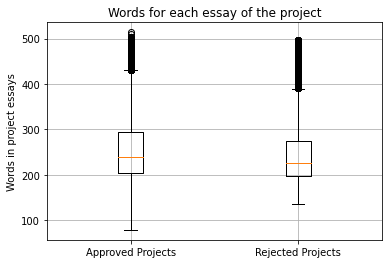

In [28]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

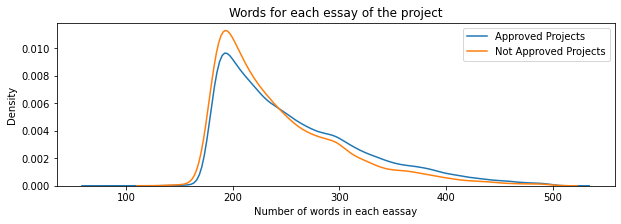

NameError: ignored

<Figure size 720x216 with 0 Axes>

In [29]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects",bw=0.8)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects",bw=0.8)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_word_count,label="Approved Projects",bw=4)
sns.kdeplot(rejected_word_count,label="Not Approved Projects",bw=4)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

* **Dont see much differnec in the word count of the essays for approved and rejected proposals**

### 1.2.8 Univariate Analysis: Cost per project

In [ ]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [ ]:
resource_data[resource_data['id']=='p000001']

,id,description,quantity,price
414179,p000001,"Cap Barbell 300 Pound Olympic Set, Grey",2,261.08
414180,p000001,Cap Barbell Power Rack Exercise Stand,2,89.00
414181,p000001,Marcy SB-10510 Flat Bench,1,85.49
414182,p000001,ProSource Puzzle Exercise Mat High Quality EVA...,2,23.99


In [ ]:
resource_data["Total_Price"]=resource_data["quantity"]*resource_data["price"]

In [ ]:
resource_data[resource_data['id']=='p000001']

,id,description,quantity,price,Total_Price
414179,p000001,"Cap Barbell 300 Pound Olympic Set, Grey",2,261.08,522.16
414180,p000001,Cap Barbell Power Rack Exercise Stand,2,89.00,178.00
414181,p000001,Marcy SB-10510 Flat Bench,1,85.49,85.49
414182,p000001,ProSource Puzzle Exercise Mat High Quality EVA...,2,23.99,47.98


In [ ]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'Total_Price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,Total_Price,quantity
0,p000001,833.63,7
1,p000002,630.28,21


In [ ]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [ ]:
project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,Total_Price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,596.36,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",686.68,22
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,431.90,4
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,Our second grade classroom next year will be m...,143.96,4


In [ ]:
approved_price = project_data[project_data['project_is_approved']==1]['Total_Price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['Total_Price'].values

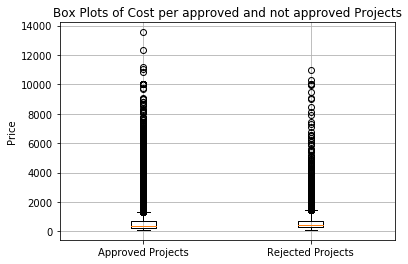

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

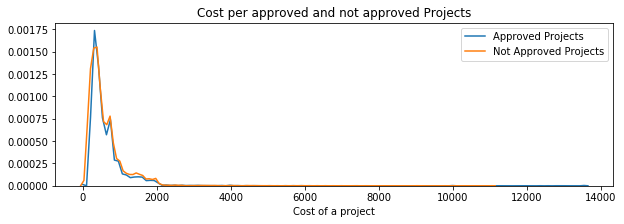

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

* **Again dont see price having any influence on the approval and rejection**

In [ ]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]
x.title = 'Cost per approved and not approved Projects'
for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+--------------------------------------------------------+
|      Cost per approved and not approved Projects       |
+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |       100.0       |         100.0         |
|     5      |      119.284      |         125.84        |
|     10     |      146.152      |        163.614        |
|     15     |       178.0       |        203.147        |
|     20     |       207.84      |        239.788        |
|     25     |      240.485      |        273.905        |
|     30     |       270.9       |        301.976        |
|     35     |       299.7       |        337.844        |
|     40     |       328.97      |         368.0         |
|     45     |       359.97      |        397.352        |
|     50     |       391.44      |         428.36        |
|     55     |      421.271      |        468.753       

### 1.2.8 Univariate Analysis: Quantity per project

In [ ]:
approved_quantity = project_data[project_data['project_is_approved']==1]['quantity'].values

rejected_quantity = project_data[project_data['project_is_approved']==0]['quantity'].values

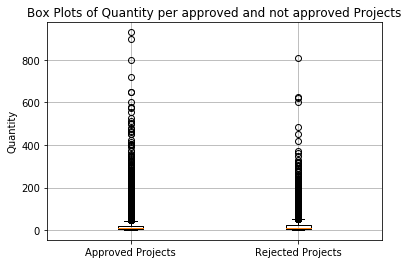

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_quantity, rejected_quantity])
plt.title('Box Plots of Quantity per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Quantity')
plt.grid()
plt.show()

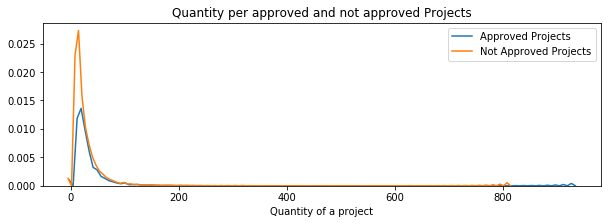

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_quantity, hist=False, label="Approved Projects")
sns.distplot(rejected_quantity, hist=False, label="Not Approved Projects")
plt.title('Quantity per approved and not approved Projects')
plt.xlabel('Quantity of a project')
plt.legend()
plt.show()

* **Again no difference in the distribution of quanitity for approved and rejected projects** 

<h3><font color='black'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

In [ ]:
approved_projects = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values

rejected_projects = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

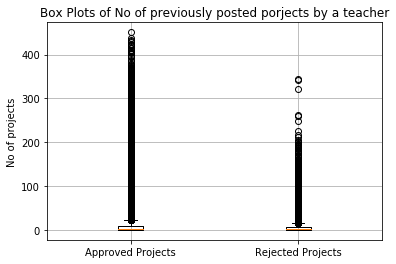

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_projects, rejected_projects])
plt.title('Box Plots of No of previously posted porjects by a teacher')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('No of projects')
plt.grid()
plt.show()

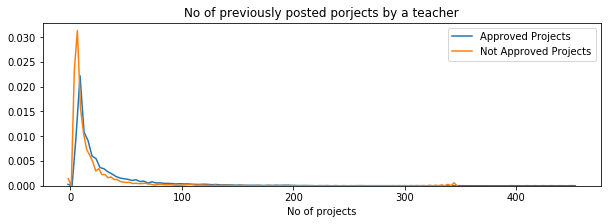

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_projects, hist=False, label="Approved Projects")
sns.distplot(rejected_projects, hist=False, label="Not Approved Projects")
plt.title('No of previously posted porjects by a teacher')
plt.xlabel('No of projects')
plt.legend()
plt.show()

* ** Again no difference in the distribution of no of previously submitted proposals for approved and rejected projects**

In [ ]:
# http://zetcode.com/python/prettytable/

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]
x.title='No of previously posted porjects by a teacher'
for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_projects,i), 3), np.round(np.percentile(rejected_projects,i), 3)])
print(x)

+--------------------------------------------------------+
|     No of previously posted porjects by a teacher      |
+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        1.0        |          0.0          |
|     35     |        1.0        |          1.0          |
|     40     |        1.0        |          1.0          |
|     45     |        2.0        |          1.0          |
|     50     |        2.0        |          2.0          |
|     55     |        3.0        |          2.0         

* ** 25% of people are first time submitters**
* ** Another 20% have 1 or 2 proposals in the past**
* ** Another 20% have 3 to 9 proposals in the past **
* ** Rest 35% have more than 10 proposals and maximum upto 451 proposals also **

**We dont see "No of previously posted porjects by a teacher" impacting the approval rates**

<h3><font color='black'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>








Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

In [ ]:
approved_project_resource_summary_count = project_data[project_data['project_is_approved']==1]['project_resource_summary'].str.split().apply(len)
approved_project_resource_summary_count = approved_project_resource_summary_count.values

rejected_project_resource_summary_count = project_data[project_data['project_is_approved']==0]['project_resource_summary'].str.split().apply(len)
rejected_project_resource_summary_count = rejected_project_resource_summary_count .values

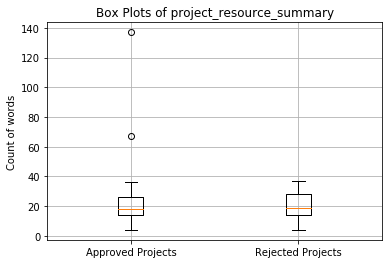

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_project_resource_summary_count , rejected_project_resource_summary_count])
plt.title('Box Plots of project_resource_summary')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Count of words')
plt.grid()
plt.show()

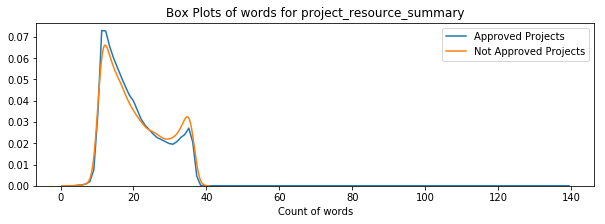

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_project_resource_summary_count, hist=False, label="Approved Projects")
sns.distplot(rejected_project_resource_summary_count, hist=False, label="Not Approved Projects")
plt.title('Box Plots of words for project_resource_summary')
plt.xlabel('Count of words')
plt.legend()
plt.show()

In [ ]:
# http://zetcode.com/python/prettytable/

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]
x.title='project_resource_summary'
for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_project_resource_summary_count,i), 3), np.round(np.percentile(rejected_project_resource_summary_count,i), 3)])
print(x)

+--------------------------------------------------------+
|                project_resource_summary                |
+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        4.0        |          4.0          |
|     5      |        11.0       |          11.0         |
|     10     |        11.0       |          11.0         |
|     15     |        12.0       |          12.0         |
|     20     |        13.0       |          13.0         |
|     25     |        14.0       |          14.0         |
|     30     |        14.0       |          15.0         |
|     35     |        15.0       |          16.0         |
|     40     |        16.0       |          17.0         |
|     45     |        17.0       |          18.0         |
|     50     |        18.0       |          19.0         |
|     55     |        19.0       |          20.0        

**We dont see "Word Count in Project Resource Summary" impacting project approval rate**

In [ ]:
#How to find any digit in a string https://stackoverflow.com/questions/19859282/check-if-a-string-contains-a-number
#def any_digit(string):
def any_digit(string):
    if any(i.isdigit() for i in string):
        return 1
    else:
        return 0

In [ ]:
project_data["project_resource_summary_isdigit"]=project_data['project_resource_summary'].apply(any_digit)

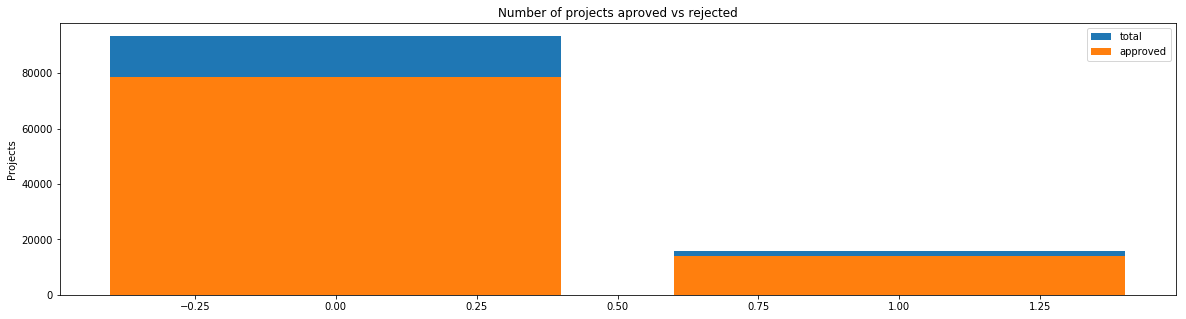

   project_resource_summary_isdigit  project_is_approved  total       Avg
0                                 0                78614  93490  0.840881
1                                 1                14089  15755  0.894256
   project_resource_summary_isdigit  project_is_approved  total       Avg
0                                 0                78614  93490  0.840881
1                                 1                14089  15755  0.894256


In [ ]:
univariate_barplots(project_data, 'project_resource_summary_isdigit', 'project_is_approved')

** As we can see the presence of Numeric No does impact the acceptance rate so we will keep this field**